In [2]:
from binance import Client,ThreadedWebsocketManager
import json
import pandas as pd
import numpy as np
import websocket
import streamlit as st
import datetime as dt 
import time as tm
import threading



api_key = 'kr41YsYIbL19a44v3vjifmD2vm6B0nldyQE6GQ7ulShpNpP4GdHU3Yl25Tr82TgO'
api_secret = 'TbqgIWkv45W42MDkW2cs1GYwhZGRteIBf38SeVKym85OnrszPalUyY16S7CjiO32'
client = Client(api_key, api_secret)
kline=ThreadedWebsocketManager(api_key,api_secret)


In [3]:
def handle_socket_message(msg):
     close=pd.DataFrame(data=msg)['k'].values[5]
     print(close)
     
     
          






In [4]:
#str=kline.start_kline_futures_socket(callback=handle_socket_message,symbol='BTCUSDT',interval=client.KLINE_INTERVAL_1MINUTE)



In [5]:

#rsi
import matplotlib.pyplot as plt
import talib as tb


def rsi_futuros(simbolo,periodos):
 p=pd.DataFrame(client.futures_klines(symbol='BTCUSDT',interval=client.KLINE_INTERVAL_1MINUTE))
 cierre=p[4].values
 resi_series=pd.Series(cierre)
 mi_rsi=tb.RSI(resi_series,timeperiod=periodos)
 return mi_rsi


def rsi_continuo_futuros(simbolo,periodos):
 i=3  
 while i>2:
      
      p=client.futures_klines(symbol=simbolo,interval=client.KLINE_INTERVAL_1MINUTE)
      
     
      return p
      

rsi_continuo_futuros('BTCUSDT',16)


      



 

[[1645187040000,
  '40375.50',
  '40396.40',
  '40373.10',
  '40391.80',
  '65.441',
  1645187099999,
  '2643105.49560',
  1244,
  '32.070',
  '1295304.31090',
  '0'],
 [1645187100000,
  '40391.80',
  '40429.90',
  '40391.00',
  '40411.90',
  '295.868',
  1645187159999,
  '11953816.97322',
  1722,
  '239.850',
  '9690394.33562',
  '0'],
 [1645187160000,
  '40411.90',
  '40419.90',
  '40390.10',
  '40391.00',
  '93.246',
  1645187219999,
  '3767662.55740',
  1322,
  '39.658',
  '1602512.04150',
  '0'],
 [1645187220000,
  '40390.10',
  '40390.10',
  '40381.80',
  '40389.60',
  '67.378',
  1645187279999,
  '2721208.11920',
  977,
  '29.275',
  '1182351.14830',
  '0'],
 [1645187280000,
  '40389.70',
  '40422.90',
  '40388.00',
  '40409.80',
  '160.933',
  1645187339999,
  '6502613.12100',
  1449,
  '119.315',
  '4821068.69410',
  '0'],
 [1645187340000,
  '40409.90',
  '40426.90',
  '40390.40',
  '40397.20',
  '79.441',
  1645187399999,
  '3210554.35990',
  1225,
  '39.409',
  '1592695.8873

In [6]:
p=pd.DataFrame(client.futures_klines(symbol='BTCUSDT',interval=client.KLINE_INTERVAL_1MINUTE))
cierre=p
tiempo=pd.Series(pd.date_range(start='2021-11-16',periods=500,freq='1T')).values
pd.DataFrame(p,index=tiempo)


,0,1,2,3,4,5,6,7,8,9,10,11
2021-11-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-16 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-16 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-16 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-16 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16 08:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-16 08:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-16 08:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-16 08:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import plotly.express as px
import plotly.graph_objects as go


klines=client.get_klines(symbol ='BTCUSDT', interval=Client.KLINE_INTERVAL_1MINUTE)
hj=pd.DataFrame(klines)
p=hj[4]
th = pd.Series(pd.date_range('2021-11-28',periods=p.size ,freq="1T"))
tf=pd.DataFrame(klines,index=th,dtype=np.float64)
tf[4]
fig=px.line(tf[4],title='BTC-USD')
fig.to_dict
fig.layout.yaxis.title.text='price'
fig.layout.xaxis.title.text='time'
fig.layout.legend.title.text='stocks'


fig.show()

#fig.show()
    






In [8]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
import json
symbols=get_nasdaq_symbols()

stock=yf.Ticker('AA')
#low=stock.history(interval="1d",start="2021-1-1")    
#frame=pd.DataFrame(low['Low'],dtype=np.float16)
information=stock.info
#string=str(marketcap)
marketcap_float=f"{information['marketCap']}"
marketcap_string=f"{information['quoteType']}"
#capitalsocial=float(marketcap_float)s
symbols['ETF']
sd=pd.DataFrame(data={'Simbolo':symbols['NASDAQ Symbol'],'ETF':symbols['ETF']})
symbols


2022-02-18 15:44:07.766 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAA,True,Listed Funds Trust AAF First Priority CLO Bond...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,Z,,True,100.0,False,NaN,AAAU,AAAU,False
AAC,True,Ares Acquisition Corporation Class A Ordinary ...,N,,False,100.0,False,NaN,AAC,AAC,False
...,...,...,...,...,...,...,...,...,...,...,...
ZXZZT,True,NASDAQ TEST STOCK,Q,G,False,100.0,True,N,NaN,ZXZZT,False
ZY,True,Zymergen Inc. - Common Stock,Q,Q,False,100.0,False,N,NaN,ZY,False
ZYME,True,Zymeworks Inc. Common Shares,N,,False,100.0,False,NaN,ZYME,ZYME,False


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
stock=yf.Ticker('AAPL')
stock_kline=stock.history(period='1mo',start='2021-12-1',end='2022-1-5',interval='1d')
stock_train=stock_kline['Close'].values
stock_date_train=stock_kline.index.values
stock_kline

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-01,167.266892,170.083311,164.320648,164.560349,152052500,0,0
2021-12-02,158.538019,163.991063,157.599213,163.551620,136739200,0,0
2021-12-03,163.811298,164.750104,159.516766,161.634064,117938300,0,0
2021-12-06,164.080946,167.666390,164.070964,165.109650,107497000,0,0
2021-12-07,168.864855,171.361674,168.125791,170.962173,120405400,0,0
2021-12-08,171.910980,175.736109,170.482792,174.857224,116998900,0,0
2021-12-09,174.687436,176.525091,173.698690,174.337875,108923700,0,0
2021-12-10,174.987069,179.401443,174.467727,179.221664,115228100,0,0
2021-12-13,180.889532,181.898256,175.306648,175.516388,153237000,0,0


In [10]:


y=stock_train
x=np.arange(1,y.size+1)


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=9)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print(x)


#0,301

(14,) (14,) (10,) (10,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [11]:
from sklearn import linear_model

In [12]:
cls=linear_model.LinearRegression(positive=True)
cls.fit(x_train.reshape(int(x_train.size),1),y_train.reshape(int(y_train.size),1))
prediction=cls.predict([[25],[27]])
print(cls.score(x_train.reshape(int(x_train.size),1),y_train.reshape(int(y_train.size),1)))
prediction





0.7343347811567809


array([[181.71011701],
       [183.02861579]])

In [13]:
from sklearn.covariance import empirical_covariance

cov=empirical_covariance(y.reshape(y.size,1))

cov

array([[30.9712804]])

In [14]:
pd.read_csv('nasdaqlist11722.csv')

,A
0,AA
1,AAA
2,AAAU
3,AAC
4,AAC=
...,...
11857,ZXZZT
11858,ZY
11859,ZYME
11860,ZYNE


In [15]:
symbols_array=pd.read_csv('nasdaqlist11722.csv').values
s1,s2,s3,s4=np.array_split(symbols_array,4)
s1_1,s1_2=np.hsplit(s1.reshape(int(s1.size/2),2),2)
s2_1,s2_2=np.hsplit(s2.reshape(int(s2.size/2),2),2)
h1,h2,h3,h4,h5=np.split(s3,5)
p1,p2,p3,p4,p5=np.split(s4,5)
symbols1=np.append(p1,s1_2)
symbols2=np.append(p2,h1)
symbols3=np.append(s2_1,p4)
symbols4=np.append(p5,s2_2)
symbols5=np.append(h2,s1_1)

sib=symbols1.tolist(),symbols2.tolist(),symbols3.tolist(),symbols5.tolist(),symbols4.tolist()
sib

(['RCA',
  'RCACU',
  'RCAT',
  'RCB',
  'RCC',
  'RCD',
  'RCEL',
  'RCFA',
  'RCFA=',
  'RCFA+',
  'RCG',
  'RCHG',
  'RCHGU',
  'RCHGW',
  'RCI',
  'RCII',
  'RCKT',
  'RCKY',
  'RCL',
  'RCLF',
  'RCLFU',
  'RCLFW',
  'RCM',
  'RCMT',
  'RCON',
  'RCOR',
  'RCOR+',
  'RCRT',
  'RCRTW',
  'RCS',
  'RCUS',
  'RDBX',
  'RDBXW',
  'RDCM',
  'RDFI',
  'RDFN',
  'RDHL',
  'RDI',
  'RDIB',
  'RDIV',
  'RDMX',
  'RDN',
  'RDNT',
  'RDOG',
  'RDS.A',
  'RDS.B',
  'RDUS',
  'RDVT',
  'RDVY',
  'RDW',
  'RDW+',
  'RDWR',
  'RDY',
  'RE',
  'REAL',
  'REAX',
  'REC',
  'RECS',
  'REDU',
  'REE',
  'REEAW',
  'REED',
  'REET',
  'REFI',
  'REFR',
  'REG',
  'REGI',
  'REGL',
  'REGN',
  'REI',
  'REIT',
  'REK',
  'REKR',
  'RELI',
  'RELIW',
  'RELL',
  'RELX',
  'RELY',
  'REM',
  'REMG',
  'REMX',
  'RENN',
  'RENO',
  'RENT',
  'REPH',
  'REPL',
  'REPX',
  'RERE',
  'RES',
  'RESD',
  'RESE',
  'RESI',
  'RESN',
  'RESP',
  'RETA',
  'RETL',
  'RETO',
  'REV',
  'REVB',
  'REVBU',
  'REVBW

In [16]:
simbolo_=[]
for i in symbols2:
 stock2=yf.Ticker(i)
 stock_kline=stock2.history(period='1mo',start='2021-12-1',end='2022-1-5',interval='1d')
 #info=yf.Ticker(i).info
 #price=f"{info['regularMarketPrice']}"
 enable=True
 if  str(stock_kline)=='Empty DataFrame\nColumns: [Open, High, Low, Close, Adj Close, Volume]\nIndex: []' :
    enable=False
 elif enable==True:
    x_train=stock_kline['Close'].values
    x=x_train.reshape(x_train.size,1)
    cov2=empirical_covariance(x)    #price=='None' or
    
    
    covariance=cov2
 if covariance >28 and covariance<34:
    print(i,covariance)
    simbolo_.append(i)
    print(stock2.earnings['Earnings'].mean())
    

      
    
    


- SEAH=: No data found, symbol may be delisted
- SEAH+: No data found, symbol may be delisted
- SEDA=: No data found, symbol may be delisted
- SEDA+: No data found, symbol may be delisted
- SF-B: No data found, symbol may be delisted
- SF-C: No data found, symbol may be delisted
- SF-D: No data found, symbol may be delisted
- SFB: No data found for this date range, symbol may be delisted
SGEN [[29.33636944]]
-110536000.0
- SGIIW: No data found for this date range, symbol may be delisted
- SGLBW: No data found for this date range, symbol may be delisted
- SHACW: No data found for this date range, symbol may be delisted
- SHAP=: No data found, symbol may be delisted
- SHIPZ: No data found for this date range, symbol may be delisted
- SHO-H: No data found, symbol may be delisted
- SHO-I: No data found, symbol may be delisted
- SHPW+: No data found, symbol may be delisted
- SHQAW: No data found for this date range, symbol may be delisted
SHW [[29.07311143]]
1636200000.0
- SI-A: No data fou

KeyboardInterrupt: 

In [ ]:
import requests
url='https://api.blockchain.info/stats'
s=requests.get(url=url)
s.text

ConnectionError: HTTPSConnectionPool(host='api.blockchain.info', port=443): Max retries exceeded with url: /stats (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001F9C18E90A0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
stock=yf.Ticker('AAPL')
aapl=stock.history(start='2019-1-1',interval='1d')
y=aapl['Close'].values
x=np.arange(1,y.size+1)
x_train,x_test,y_train,y_test=train_test_split(x,y)

aapl


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,37.543095,38.502944,37.383120,38.277523,148158800,0.00,0.0
2019-01-03,34.898670,35.320422,34.418748,34.464802,365248800,0.00,0.0
2019-01-04,35.031980,36.006371,34.855040,35.936077,234428400,0.00,0.0
2019-01-07,36.042728,36.074240,35.364048,35.856091,219111200,0.00,0.0
2019-01-08,36.251180,36.798974,35.999101,36.539619,164101200,0.00,0.0
...,...,...,...,...,...,...,...
2022-02-03,174.257984,176.015754,171.900986,172.679993,89418100,0.00,0.0
2022-02-04,171.679993,174.100006,170.679993,172.389999,82391400,0.22,0.0
2022-02-07,172.860001,173.949997,170.949997,171.660004,77251200,0.00,0.0


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from numba import jit,njit
prd_frame=pd.DataFrame(data={'tiempo':x,'precio':y})
prd_frame



,tiempo,precio
0,1,38.277523
1,2,34.464802
2,3,35.936077
3,4,35.856091
4,5,36.539619
...,...,...
779,780,172.679993
780,781,172.389999
781,782,171.660004
782,783,174.830002


In [ ]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=2)
prs_x=np.arange(778,786)
prs_x.reshape(prs_x.size,1)
def a():
 """for i in range (1,49):
 h=[]
   t=[]
   for i in [x_l]: 
   x_l=i-4
   t.append(x_etr[x_l:x_l+4])
    print(t)"""
 return int(1+2)
a()

3

In [ ]:

p=[]
t=[]
expectativa=[]
n_d=[]
for n in prs_x.reshape(prs_x.size,1):
 
 for i in range(1,20): 
  clf=MLPRegressor(hidden_layer_sizes=(15,15,15),max_iter=500,learning_rate_init=0.00899)#0.009
  clf.fit(x.reshape(x.size,1),y)
  punctuation=clf.score(x.reshape(x.size,1),y.reshape(y.size,1))
  predict=clf.predict([n])
 
  if punctuation>0.96:
   p.append(predict)
   t.append(punctuation)
   print(punctuation,predict,n)
 prediccion=np.mean(p)
 print('promedio de probabilidad:',prediccion)
 expectativa.append(prediccion)
 n_d.append(n)
 

NameError: name 'prs_x' is not defined

validador cruzado: 0.8329102698234621


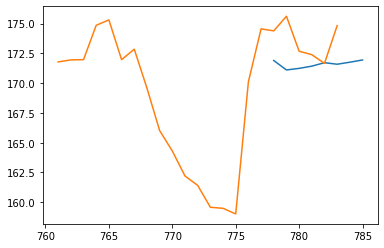

In [ ]:



plt.plot(n_d,expectativa)
plt.plot(prd_frame['tiempo'][760:],prd_frame['precio'][760:])
vli=cross_val_score(clf,x_train.reshape(x_train.size,1),y_train)

print('validador cruzado:',vli.mean())
plt.sh


In [ ]:
@jit
def grafica_curva_de_aprendizaje(estimador,x,y):
   lcu=learning_curve(estimador,x,y)
   n_job,per1,per2=lcu
   n_ejemplos=[]
   for i in range(1,per1.size+per2.size+1):
      n_ejemplos.append(i)
   per=np.append(per1.reshape(per1.size,1),per2.reshape(per2.size,1)) 
   plt.plot(n_ejemplos,per*100)
   plt.xlabel('numero de ejemplos')
   plt.ylabel('percentaje%')
   plt.show()

<ipython-input-23-3d760e08ab8f>:1: NumbaWarning:


Compilation is falling back to object mode WITH looplifting enabled because Function "grafica_curva_de_aprendizaje" failed type inference due to: Untyped global name 'learning_curve': Cannot determine Numba type of <class 'function'>

File "<ipython-input-23-3d760e08ab8f>", line 3:
def grafica_curva_de_aprendizaje(estimador,x,y):
   lcu=learning_curve(estimador,x,y)
   ^


2022-02-08 22:47:15.889 INFO    numba.core.transforms: finding looplift candidates
<ipython-input-23-3d760e08ab8f>:1: NumbaWarning:


Compilation is falling back to object mode WITHOUT looplifting enabled because Function "grafica_curva_de_aprendizaje" failed type inference due to: Untyped global name 'learning_curve': Cannot determine Numba type of <class 'function'>

File "<ipython-input-23-3d760e08ab8f>", line 3:
def grafica_curva_de_aprendizaje(estimador,x,y):
   lcu=learning_curve(estimador,x,y)
   ^


C:\Users\taxid\anaconda3\lib\site-packages\numba\core\object

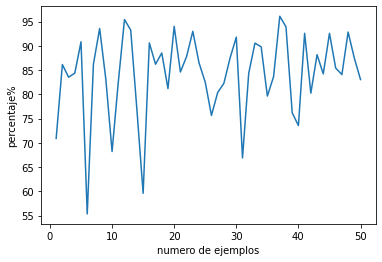

In [ ]:
grafica_curva_de_aprendizaje(clf,x_train.reshape(x_train.size,1),y_train)

In [ ]:
import tensorflow as tf


ImportError: Could not find the DLL(s) 'msvcp140_1.dll'. TensorFlow requires that these DLLs be installed in a directory that is named in your %PATH% environment variable. You may install these DLLs by downloading "Microsoft C++ Redistributable for Visual Studio 2015, 2017 and 2019" for your platform from this URL: https://support.microsoft.com/help/2977003/the-latest-supported-visual-c-downloads

In [ ]:
def log_return(price): # rentabilidad logaritmica
     return np.log(price/price.shift(1))


<AxesSubplot:ylabel='Density'>

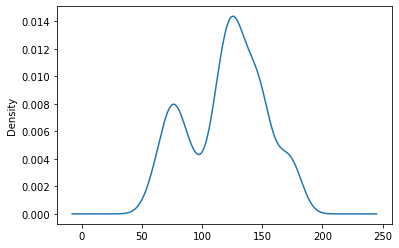

In [ ]:
import yfinance as yf
price=yf.Ticker('AAPL').history(interval='1d',start='2020-1-1')
rentabilidad=log_return(price['Close'])
#plt.plot(rentabilidad)
#pd.plotting.autocorrelation_plot(price['Close'])
price['Close'].plot.density()



Date
2020-01-02         NaN
2020-01-03   -0.009769
2020-01-06    0.007936
2020-01-07   -0.004714
2020-01-08    0.015958
                ...   
2022-02-10   -0.023882
2022-02-11   -0.020426
2022-02-14    0.001422
2022-02-15    0.022889
2022-02-16   -0.010413
Name: Close, Length: 537, dtype: float64


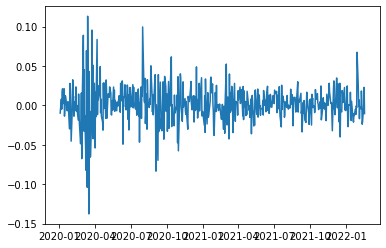

In [ ]:
plt.plot(rentabilidad)
print(rentabilidad)


In [ ]:
import math
intervalo=price-price.shift(1)
price['Close'].std()/math.sqrt(intervalo['Close'].mean())

def log_xVO(price): #volatilidad de parkinson con transformaciones de cierre y apertura
 dm=[]
 for i in range(1,price.index.size+1):
    dm.append(i)
 nm=1/2*np.log(price['High']/price['Low'])**2+2*np.log(2)-1*np.log(price['Close']/price['Open'])**2
 vlt=nm/dm
 return np.sqrt(vlt)

def log_parkinson(precio): #volatilidad de parkinson
 n=[]
 for i in range(1,price.index.size+1):
    n.append(i)
 nm=np.sqrt(1/np.array(n)*np.log(precio['High']/price['Low'])**2)
 dm=np.sqrt(4*np.log(2))
 return nm/dm 

Date
2020-01-02    1.177399
2020-01-03    0.832582
2020-01-06    0.679750
2020-01-07    0.588714
2020-01-08    0.526533
                ...   
2022-02-10    0.051002
2022-02-11    0.050951
2022-02-14    0.050905
2022-02-15    0.050857
2022-02-16    0.050810
Length: 537, dtype: float64


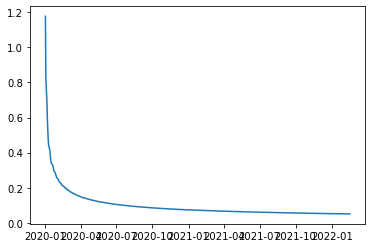

In [ ]:
import matplotlib.pyplot as plt
vlo=log_xVO(price)
plt.plot(vlo)
print(vlo)






In [ ]:
vtp=log_parkinson(price[528:])
plt.plot(vtp)

print(vtp)

NameError: name 'log_parkinson' is not defined

50.0